In [1]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
#from keras import Sequential
#from keras.models import Model
#from keras.layers import Dense, Input, Activation
#from keras import optimizers
import matplotlib.pyplot as plt

### Generate data

In [2]:
#Pick N random points on the square [-1,1]x[-1,1] and group them into 2 categories (0 and 1)
N=200
points=[]
labels=[]
for i in range(N):
    x=random.uniform(-1,1)
    y=random.uniform(-1,1)
    
    points+=[[x,y]]
    #labels+=[0] if x>0 else [1]
    labels+=[0] if x*x+y*y>0.5 else [1]
    #labels+=[0] if (x+0.4)*(x+0.4)+(y-0.5)*(y-0.5)<0.03 or\
                    #(x-0.4)*(x-0.4)+(y-0.5)*(y-0.5)<0.03 or\
                    #(x*x+y*y>0.4 and x*x+y*y<0.6 and y<0)\
                    #else  [1]

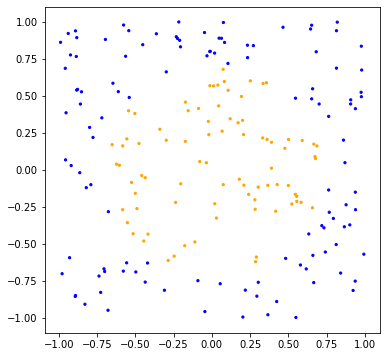

In [3]:
#Plot the two categories
x=[points[i][0] for i in range(len(points))]
y=[points[i][1] for i in range(len(points))]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(x,y,c=colors[labels],s=5)

### Define Neural Network

In [4]:
# Create a network with 2 layers of 32 neurons each
# Probably the simplest way to do so
model = tf.keras.Sequential(name="2D_Classifier") 
model.add(keras.layers.InputLayer(input_shape=(2,)))
model.add(keras.layers.Dense(32,activation='relu', name="hidden_layer_1"))
model.add(keras.layers.Dense(32,activation='relu', name="hidden_layer_2"))
model.add(keras.layers.Dense(1,activation='relu', name="output_layer"))
model.build()

There are of course other kind of layers, not only Dense. I guess we will need Convolutional layers for our task. They can also be found in keras, under the name 'Conv2D'.

In [5]:
model.summary()

Model: "2D_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 32)                96        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 32)                1056      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


### Train Neural Network 

In [6]:
model.compile(optimizer='adam',loss='mse',metrics=[tf.metrics.CategoricalAccuracy()])
#this just means that we want to minimize the mean squared error

In [7]:
#and this is the actual training part
points=np.array([np.array(i) for i in points])
labels=np.array([np.array(i) for i in labels])
model.fit(points, labels,batch_size=50, epochs=100, shuffle=True,verbose=0)

train_accuracy=model.evaluate(points, labels, batch_size=128)

200/200 [==============================] - 0s 439us/sample - loss: 0.0262 - categorical_accuracy: 1.0000


### Test

In [8]:
#create a fine grid and evaluate the network on them to see how it performs on previously unseen points
N=100
testpoints=np.array([np.array([x/N,y/N]) for x in range(-1*N,N) for y in range(-1*N,N)])
label_predictions=np.array(model.predict([testpoints]))
testlabels=list(map((lambda x: 1 if x>0.5 else 0),label_predictions))

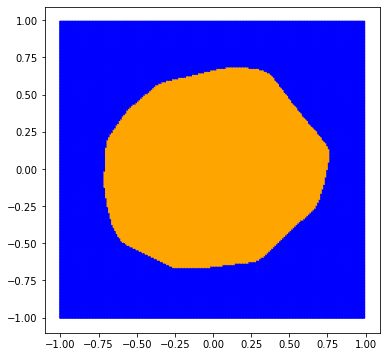

In [9]:
#plot
x_test=[testpoints[i][0] for i in range(len(testpoints))]
y_test=[testpoints[i][1] for i in range(len(testpoints))]
colors=np.array(['blue','orange'])
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test,c=colors[testlabels],s=2)

### Save&Load Model

In [10]:
#save model
model.save_weights('./2d_classifier/weights')
del model
# Create a new model with same structure
model = keras.Sequential(name="2D_Classifier") 
model.add(keras.layers.InputLayer(input_shape=(2,)))
model.add(keras.layers.Dense(32,activation='relu', name="hidden_layer_1"))
model.add(keras.layers.Dense(32,activation='relu', name="hidden_layer_2"))
model.add(keras.layers.Dense(1,activation='relu', name="output_layer"))
model.build()

# Restore the weights
model.load_weights('./2d_classifier/weights')